In [4]:
from proglearn.sims import generate_gaussian_parity
import xor_xnor_functions as fn
import gym
import random
import os
import numpy as np
import tensorflow
from collections         import deque
from tensorflow.keras.models     import Sequential
from tensorflow.keras.layers     import Dense
from tensorflow.keras.optimizers import Adam

In [5]:
class Agent():
    def __init__(self, state_size, action_size):
        self.weight_backup      = "cartpole_weight.h5"
        self.state_size         = state_size
        self.action_size        = action_size
        self.memory             = deque(maxlen=2000)
        self.learning_rate      = 0.001
        self.gamma              = 0.95
        self.exploration_rate   = 1.0
        self.exploration_min    = 0.01
        self.exploration_decay  = 0.995
        self.brain              = self._build_model()

    def _build_model(self):
        # Neural Net for Deep-Q learning Model
        model = Sequential()
        model.add(Dense(24, input_dim=self.state_size, activation='relu'))
        model.add(Dense(24, activation='relu'))
        model.add(Dense(self.action_size, activation='linear'))
        model.compile(loss='mse', optimizer=Adam(lr=self.learning_rate))

        if os.path.isfile(self.weight_backup):
            model.load_weights(self.weight_backup)
            self.exploration_rate = self.exploration_min
        return model

    def save_model(self):
            self.brain.save(self.weight_backup)

    def act(self, state):
        if np.random.rand() <= self.exploration_rate:
            return random.randrange(self.action_size)
        act_values = self.brain.predict(state)
        return np.argmax(act_values[0])

    def remember(self, state, action, reward, next_state, done):
        self.memory.append((state, action, reward, next_state, done))

    def replay(self, sample_batch_size):
        if len(self.memory) < sample_batch_size:
            return
        sample_batch = random.sample(self.memory, sample_batch_size)
        for state, action, reward, next_state, done in sample_batch:
            target = reward
            if not done:
              target = reward + self.gamma * np.amax(self.brain.predict(next_state)[0])
            target_f = self.brain.predict(state)
            target_f[0][action] = target
            self.brain.fit(state, target_f, epochs=1, verbose=0)
        if self.exploration_rate > self.exploration_min:
            self.exploration_rate *= self.exploration_decay

In [ ]:
class XOR(gym.env):
    def __init__(self):
        self.action_space = 1
        self.observation_space = gym.spaces.Discrete(2)
    
    def step(self, action):
        state = 1
        

In [6]:
class CartPole:
    def __init__(self):
        self.sample_batch_size = 32
        self.episodes          = 10
        self.env               = gym.make('CartPole-v1')

        self.state_size        = self.env.observation_space.shape[0]
        self.action_size       = self.env.action_space.n
        self.agent             = Agent(self.state_size, self.action_size)


    def run(self):
        try:
            for index_episode in range(self.episodes):
                state = self.env.reset()
                state = np.reshape(state, [1, self.state_size])

                done = False
                index = 0
                while not done:
#                    self.env.render()

                    action = self.agent.act(state)

                    next_state, reward, done, _ = self.env.step(action)
                    next_state = np.reshape(next_state, [1, self.state_size])
                    self.agent.remember(state, action, reward, next_state, done)
                    state = next_state
                    index += 1
                print("Episode {}# Score: {}".format(index_episode, index + 1))
                self.agent.replay(self.sample_batch_size)
        finally:
            self.agent.save_model()

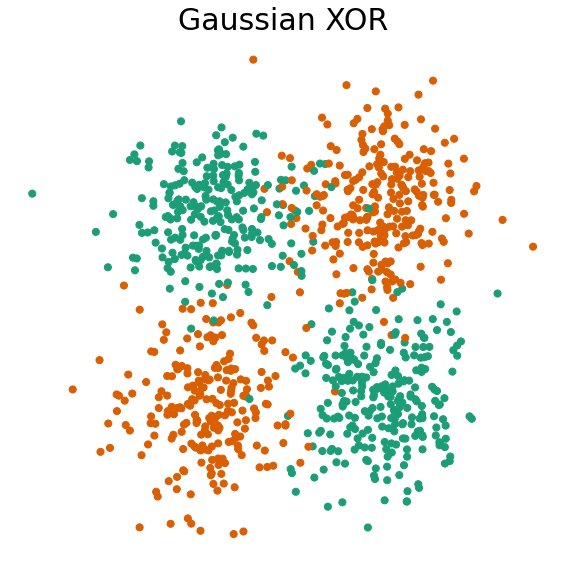

[1 1 1 0 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 0 1 0 1 1 1 1 1 1 0 1 0 1 0 1 0
 0 0 0 1 1 1 0 1 0 1 0 0 1 0 0 1 1 1 1 1 0 1 1 1 0 1 1 0 1 1 0 0 0 1 1 1 0
 1 1 1 1 0 0 1 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 1 0 1 0 1 1 0 1 0 1 1 0 1 1 0
 1 1 0 0 1 1 1 1 0 1 1 0 0 1 1 0 1 1 0 1 1 0 0 0 0 1 0 0 1 0 0 1 1 1 1 0 0
 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1 0 0 0 1 1 0 1 1 1 1 0 1 0 1 1 1 1 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 1 1 0 0 1 1 0 1 1 1 0 0 0 1 1 1 1 1 0 1 0 0 0 0 1 0 0
 0 0 1 1 0 0 0 1 0 1 1 0 1 0 1 0 0 0 0 1 0 0 1 1 1 1 1 0 1 0 1 0 0 1 1 1 0
 0 1 0 0 1 0 1 1 0 0 1 1 0 0 1 0 1 0 0 1 0 1 0 1 0 0 1 0 1 0 1 1 0 0 1 1 1
 0 0 0 1 0 0 1 0 1 1 1 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 0 1 0
 1 0 0 1 0 1 1 1 0 0 0 1 1 1 1 0 1 1 0 1 0 0 1 0 0 0 0 0 1 1 0 0 1 1 1 0 1
 1 0 1 0 1 0 1 1 0 0 1 1 0 0 1 0 1 1 1 0 0 1 1 1 0 0 1 0 0 1 0 0 1 1 1 0 1
 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 1 0 1 0 1 1 0 0 0 0 0 0 1 1 1 1 0 0
 1 0 0 0 0 1 1 0 0 1 0 1 0 1 0 0 1 0 0 0 1 0 1 1 1 0 0 0 1 1 0 1 0 1 0 0 1
 1 0 1 1 1 0 1 1 1 1 0 0 

In [9]:
if __name__ == "__main__":
    #cartpole = CartPole()
    #cartpole.run()
    
    X_xor, y_xor = generate_gaussian_parity(1000)
    fn.plot_xor_xnor(X_xor, y_xor, "Gaussian XOR")
    print(y_xor)
